In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import nltk



import base64

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
%matplotlib inline

In [35]:
df = pd.read_csv('../db/detalhes_deputado.csv')
df2 = pd.read_csv('../db/deputados.csv')

In [36]:
# df.describe()

In [37]:
# df.describe()

In [38]:
cols = ['ide_cadastro','nome_civil','partido_atual_sigla','uf_representacao_atual','sexo','data_nascimento','data_falecimento','nome_profissao']
df= df[cols]

In [39]:
df_detalhes=df.drop_duplicates(subset='ide_cadastro', keep="first").reset_index(drop=True)
# df_detalhes.head()


In [40]:
df_detalhes['nome_profissao'] =  df_detalhes['nome_profissao'].str.strip()
df_detalhes['nome_profissao'] =  df_detalhes['nome_profissao'].astype(str)
profissoes = df_detalhes['nome_profissao'].tolist()
# print(profissoes)

In [41]:
profs = []
# print(type(proficoes[0]))
# words = nltk.word_tokenize(proficoes[0])
for string in profissoes:
    words = nltk.regexp_tokenize(string, pattern=r",", gaps=True)
    profs=profs+words
profs2=[]
for word in profs:
    word = word.title()
    profs2.append(word)
profs=profs2
# print(profs)

In [42]:
stopwords = [',']


for word in profs:
    
    if word in stopwords:
        profs.remove(word)
        
             


In [43]:
df = pd.DataFrame({'profissoes':profs})
df['profissoes'] = np.where(df['profissoes']=='Nan','Desconhecida',df['profissoes'])
df['profissoes'] =  df['profissoes'].str.strip()


In [44]:
# print(len(df['profissoes'].unique()))
# df['count']=1
# df=df.groupby('profissoes', as_index=False).sum().sort_values(by='count',ascending=False)
# # df = df.sort(['count'], ascending=[True])
# df.head()

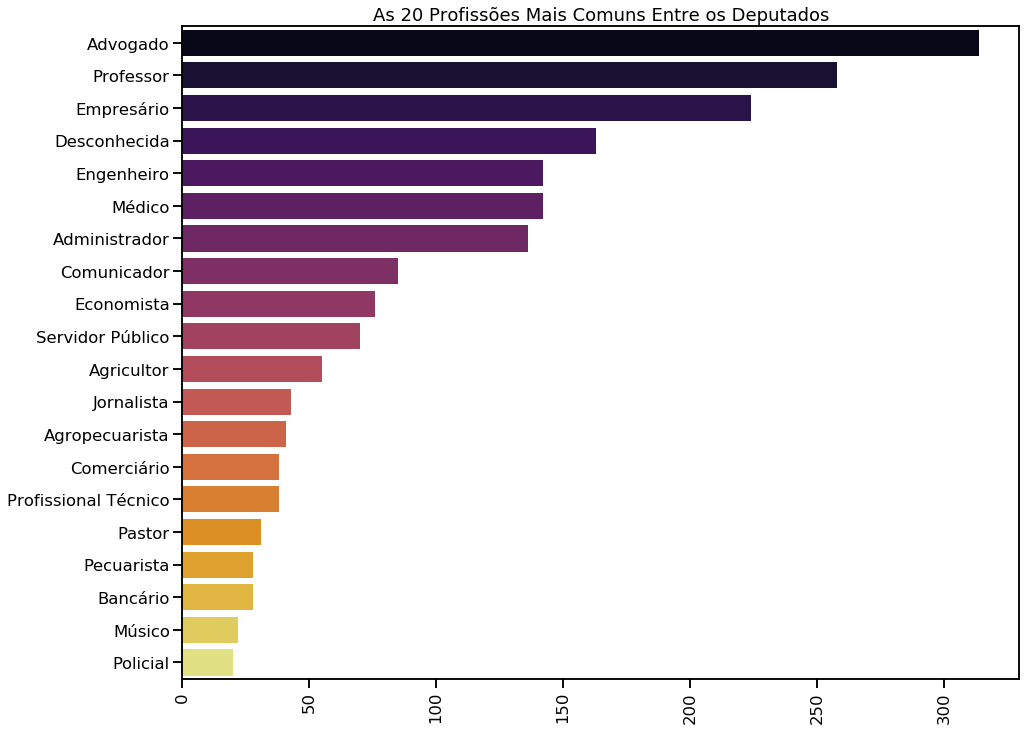

In [24]:
sns.set_context("talk")
sns.barplot(df['profissoes'].value_counts()[0:20].values,df['profissoes'].value_counts()[0:20].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(15,12)
plt.title('As 20 Profissões Mais Comuns Entre os Deputados')
plt.show()

In [29]:
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})


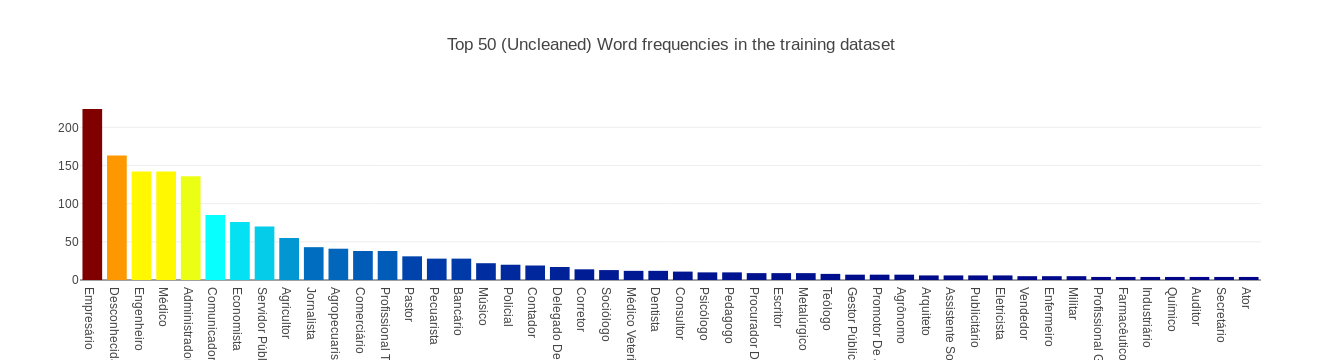